### Programme inspecteur modèles BNP Paribas - module Monte-Carlo methods - 12 décembre 2019

# TP 1

## Warm-up: Simulation of random variables with Python and fundamental limit theorems


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1. Simulation of a probability density with the rejection method

We consider the probability distribution with support $[-2, 2]$ and density function
$$
f(x) = \frac 1{2\pi} \sqrt{4 - x^2} 1_{x \in [-2,2]} ,
$$
usually called the Wigner law.

$\blacktriangleright$ Implement a simulation method allowing to draw i.i.d. samples from the Wigner law. Simulate a large  number of samples, plot the histogram and compare with the density $f$.

_Reminder on the rejection method_: in order to simulate a random variable with density $f$ of support $[x_0, x_1]$ and such that $0\leq f\leq M$, one can use a sequence of independent couples of random variables $(Z_k, U_k)_{k\geq 1}$ such that, for every $k$, $Z_k$ and $U_k$ are independent and uniformly distributed respectively on $[x_0, x_1]$ and $[0, 1]$.

If we set

$$ \nu = \min\{k\geq 1 : \, f(Z_k) > M U_k \}, $$

the random variable $Z_\nu$ is distributed according to the density $f$.

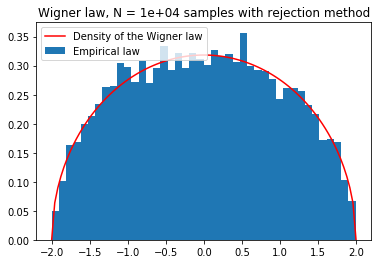

In [36]:
def wigner_density(x):
    return np.sqrt(4 - x*x) / (2*np.pi)

N = int(1.e4)

########################################
# To Do: complete with an upper bound M
# for the density f
########################################
upper_bound = 1 / np.pi

X = np.array([])

for _ in range(N):
    # There is no "while ... do" in Python
    # A possible solution is given below
    
    ########################################
    # To Do: sample the variables
    # z according to uniform distribution over [-2,2]
    # u according to uniform distribution over [0,1]
    ########################################
    z = np.random.uniform(high=2, low=-2, size=1)
    u = np.random.uniform(high=1, low=0, size=1)
    
    v = upper_bound * u # THIS IS M * U
    
    while v >= wigner_density(z): # WHILE THE CONDITION FAILS
        #################################
        # To Do: complete the code below
        #################################
        z = np.random.uniform(high=2, low=-2, size=1)
        u = np.random.uniform(high=1, low=0, size=1)
        
        v = u * upper_bound

    X = np.append(X, z)

##############################
# Plot the histogram
##############################
n_columns = 2 * int(N**(1/3))

plt.hist( X , density=True, bins=n_columns, label="Empirical law")
    
########################################
# Plot the true density for comparison
########################################
x = np.linspace(-2., 2., 100)

f_x = wigner_density(x)

plt.plot( x, f_x, "r", label="Density of the Wigner law", linewidth=1.5)

plt.legend(loc='best')
plt.title("Wigner law, N = %1.0e samples with rejection method" %N)
plt.show()

### Exercise 2. Law of large numbers.

Let $(X_i)_{i\ge1}$ be a sequence of i.i.d. random variables such that $\mathbb{E}\bigl[ \bigl|X_1\bigr| \bigr]<\infty$.
We remind that the law of large numbers states that the sequence of _empirical means_
$$
\hat m_n = \frac1n \sum_{i=1}^n X_i
$$
converges almost surely to $\mathbb{E}[X_1]$ as $n\to \infty$.

#### 1.1 Convergence of the sequence $\hat m_n$ as $n$ becomes large

Draw $n$ independent random samples uniformly distributed  $[0,1]$ and plot the sequence $n \mapsto \hat m_n$ for $n$ ranging from $1$ to $N$.

The following functions from `numpy` can be used: `numpy.random.rand` to draw the $n$ samples from the uniform distribution on $[0,1]$, and the function `numpy.cumsum` to compute the cumulated sum up to $n$.

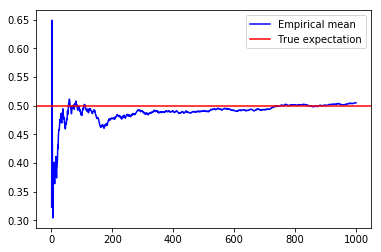

In [39]:
N = 1000 #sample size

########
# Complete with N draws from the uniform distribution on [0,1]
#
X = np.random.uniform(0, 1, N)
#
########

integers1toN = np.arange(1,N+1) 
# A numpy array containing the integers from 1 to N

############
# Stock in the variable 'empMean' the sequence of empirical means for n ranging
# from 1 to N
#
empMean = np.cumsum(X) / integers1toN ## WANT: AN ARRAY OF SIZE N
############

############
# Plotting
############
plt.plot(integers1toN, empMean, color="b", label="Empirical mean")

# A horizontal line for the reference theoretical value
plt.axhline(0.5, color="r", label="True expectation")

plt.legend(loc="best")

plt.show()

#### 1.2 Another example

The Cauchy distribution with parameter $a > 0$ is the probability distribution on $\mathbb R$ with density function
$$
f(x) = \frac a{\pi(a^2+x^2)}.
$$

#### $\blacktriangleright$ Question (a):

$F(x)=\int_{-\infty}^x f(y) dy $ is the cumulative distribution function (cdf) of the Cauchy distribution.
Let $U$ be a r.v. uniformly distributed on $[0,1]$. 

What is the law of $F^{-1}(U)$?

#### $\blacktriangleright$ Question (b):

Noticing that $F(x) = \frac1{\pi}\arctan(\frac xa)+\frac12$, generate $N$ i.i.d. samples distributed according to the Cauchy distribution wit parameter $a=1$, still using the function `numpy.random.rand`.

Plot the sequence of the empirical means $\hat m_n$ for $n$ ranging from $1$ to $N$.

What do you observe?

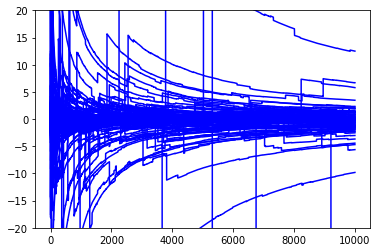

In [40]:
N = 10000
M = 100

U = np.random.rand(M, N)

a = 1.

########
# Stock in the variable X the N draws from the Cauchy distribution with parameter a,
# exploiting the inverse of the cdf 
#
X = a * np.tan( np.pi * (U - 0.5) )
#
########

integers1toN = np.arange(1,N+1)

########
# Stock in the variable 'empMean' the sequence of empirical means for n ranging
# from 1 to N
# 
empMean = np.cumsum(X, axis=1) / integers1toN
########

# Plot the sequence of the empirical means
#
plt.plot(integers1toN, empMean.T, color="b")

#plt.legend(loc="best")
plt.ylim(-20, 20)

plt.show()

### Exercise 3. Central limit theorem and confidence intervals.

Let $(X_i)_{i\ge1}$ be a sequence of i.i.d. random variables with $\mathbb E[X_1^2]<\infty$, and denote $\hat m_n = \frac1n \sum_{i=1}^n X_i$ the sequence of their empirical means.

The central limit theorem states that the sequence of _renormalized errors_

$$
e_n = \frac{\sqrt n}{\sqrt{Var(X_1)}} \bigl(\hat m_n - \mathbb E[X_1] \bigr)
$$

converges in law towards a Gaussian distribution $\mathcal{N}(0,1)$ as $n \to \infty$.

#### 2.1 Convergence in law of the error

The goal of this first part is to display the closeness of the distribution of the renormalized error $e_n$ with the Gaussian distribution, when $n$ is sufficiently large.
 
We consider a sequene of i.i.d. random variables with exponential distribution pf parameter $\lambda = 2$.

For fixed $n$, draw a sample of $M$ values $ \bigl(\hat m_n^j \bigr)_{j=1,\dots,M}$ of the empirical mean.

Plot the histogram of the corresponding sample of values of the renormalized error

$$
e^j_n = \sqrt{\frac n{Var(X_1)}} \bigl(\hat m^j_n - \mathbb E[X_1] \bigr),
\qquad j = 1, \dots, M
$$

and compare with the standard Gaussian distribution.

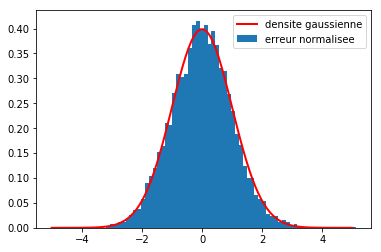

In [41]:
n = 3000 # n draws of the exponential distribution to compute the empirical mean
M = 5000 # number of samples of the empirical mean

####################################################
# n*M independent draws of the exponential distribution
# with parameter lambda=2
#
lambd = 2

# Pay attention to the arguments of the function random.exponential 
X = np.random.exponential(1/lambd, (M, n))
####################################################

# True known values of expectation and variance (as a benchmark)
esp = 1/lambd
var = (1/lambd)**2

####################################################
# Stock in the variable 'empMean_n' the sample of M independent 
# values of the empirical mean

# WANT: M independent values of the empirical mean for fixed n 
empMean = np.sum(X, axis=1) / n # SAMPLE OF SIZE M

# Stock in the variable 'renormError_n' the sample of M independent
# values of the renormalized error 
renormError_n = np.sqrt(n / var) * (empMean - esp)

####################################################
# Plotting
plt.hist( renormError_n , density="True", bins=int(np.sqrt(M)), label="erreur normalisee")

####################################################
# Standard gaussian density for comparison
x = np.linspace(-5, 5, 100)

gaussianDensity = np.exp( - x*x / 2) / np.sqrt(2*np.pi)

####################################################
# Plotting
plt.plot(x, gaussianDensity, color="red", label="densite gaussienne", linewidth=2.0)

plt.legend(loc="best")
plt.show()

#### 2.2 Confidence intervals

Contrary to the previous example, in practice one does not know the value $Var(X_1)$ (which cannot be used, then, to build the confidence intervals).

Yet, it is possible to estimate $Var(X_1)$ with the same random sample used to estimate $\mathbb E[X]$, using the empirical variance as an estimator:

$$
\sigma_n^2 = \frac1n \sum_{i=1}^n X_i^2 - (\hat m_n)^2
$$.

#### $\blacktriangleright$ Question (a):

Which result allows to state that the random sequence
$$
\frac{\sqrt n}{\sigma_n} \left(\hat m_n - \mathbb E[X_1]\right)
$$
converges in law towards $\mathcal{N}(0,1)$, when $n \to \infty$?

#### $\blacktriangleright$ Question (b):

Defining for $\delta > 0$ the (random) interval
$$
I_n^{\delta}=\Bigl[\hat m_n -\delta\frac{\sigma_n}{\sqrt n},\ \hat m_n +\delta\frac{\sigma_n}{\sqrt n}\Bigr],
$$
the previous question entails that

$$
\mathbb P\Bigl(\mathbb E[X_1] \in I_n^{\delta}\Bigr)
=
\mathbb P\biggl(\frac{\sqrt n}{\sigma_n} \bigl|\ \hat m_n - \mathbb E[X_1]\bigr| \le \delta \biggr)
\longrightarrow \mathbb P \bigl(|\mathcal{N}(0,1)|\le \delta \bigr) = 2\int_0^{\delta} \frac{e^{-x^2/2}}{\sqrt{2\pi}} dx
$$
as $n \to \infty$.

When $\delta=1.96$, the last term on the right hand side is approximately equal to $0.95$, which allows to identify $I_n^{1.96}$ as the $95\%$ _asymptotic_ confidence interval for the true value of the expectation $\mathbb E[X_1]$.

In the cell below: give an estimate of the expectation of a random variable uniformly distributed on $[0,1]$ with the $95\%$ _asymptotic_ confidence interval obtained above.

In [42]:
N = 4000
X = np.random.rand(N)

empMean = np.sum(X) / N

################################################################
# Stock in the variable 'mean_of_squares' the empirical mean
# of the X_i^2
#
mean_of_squares = np.mean(X*X)

# Stock in the variable 'emp_variance' the empirical variance,
# and in radius_CI the half lenght of the 95% confidence interval
# for the expectation of X
#
emp_variance = mean_of_squares - empMean*empMean
# 
radius_CI = 1.96 * np.sqrt(emp_variance / N )
################################################################

# Theoretical true value for comparison
esp = 0.5

print("True expectation: %1.4f \n" %esp)
print("Empirical mean: %1.4f \n" %empMean)

print("0.95 Confidence interval: [%1.4f, %1.4f] \n" %(empMean - radius_CI, empMean + radius_CI) )

print("Relative error*100: %1.1f" %(radius_CI/empMean * 100) )

True expectation: 0.5000 

Empirical mean: 0.4931 

0.95 Confidence interval: [0.4841, 0.5020] 

Relative error*100: 1.8
